In [1]:
# importing required modules
import pandas as ps
import numpy as ny
import matplotlib.pyplot as plot
import seaborn as sns

In [2]:
data= ps.read_csv(r"D:\WORK\Diabetic-prediction-using-multiple-machine-learning-algorithms\diabetes_prediction_dataset.csv")

In [3]:
# top 5 rows of the dataset
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [4]:
# checking null values
data.isnull()

gender    age  hypertension  heart_disease  smoking_history    bmi  \
0       False  False         False          False            False  False   
1       False  False         False          False            False  False   
2       False  False         False          False            False  False   
3       False  False         False          False            False  False   
4       False  False         False          False            False  False   
...       ...    ...           ...            ...              ...    ...   
99995   False  False         False          False            False  False   
99996   False  False         False          False            False  False   
99997   False  False         False          False            False  False   
99998   False  False         False          False            False  False   
99999   False  False         False          False            False  False   

       HbA1c_level  blood_glucose_level  diabetes  
0            False                False     False  
1            False                False     False  
2            False                False     False  
3            False                False     False  
4            False                False     False  
...            ...                  ...       ...  
99995        False                False     False  
99996        False                False     False  
99997        False                False     False  
99998        False                False     False  
99999        False                False     False  

[100000 rows x 9 columns]

In [5]:
# describe data set
data.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [6]:
data.shape

(100000, 9)

Exploratory Data Analysis (EDA)

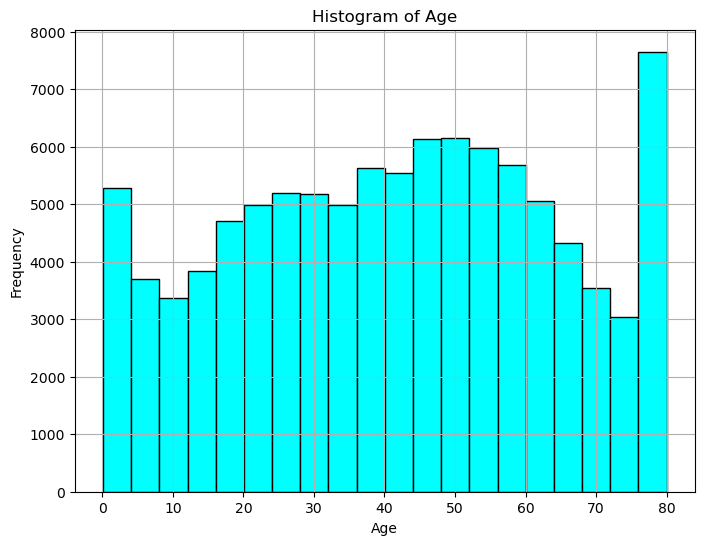

In [7]:
# Frequency distribution of age
plot.figure(figsize=(8,6))
plot.hist(data['age'], bins=20, edgecolor="black", color="cyan")
plot.title('Histogram of Age')
plot.xlabel('Age')
plot.ylabel('Frequency')
plot.grid(True)
plot.show()

In [8]:
# Defining colors to every gender catagory
colors = {'Male': 'blue', 'Female': 'red', 'Other': 'green'}

plot.figure(figsize=(6, 4))
sns.countplot(x='gender', data=data, palette=colors)
plot.title('Count Plot of Gender')
plot.xlabel('Gender')
plot.ylabel('Count')
plot.show()

In [9]:
plot.figure(figsize=(8, 6))
sns.histplot(data['HbA1c_level'],kde=True, color= 'green')
plot.title('Distribution of HbA1c Level')
plot.xlabel('HbA1c_level')
plot.ylabel('Density')
plot.grid(True)
plot.show()

In [10]:
plot.figure(figsize=(8, 6))
sns.boxplot(x='gender', y= 'bmi', data=data)
plot.title('Boxplot of BMI at Gender')
plot.xlabel('Gender')
plot.ylabel('BMI')
plot.grid(True)
plot.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [11]:
# Defineing color palatte for several smoking history categories
avg_glucose_by_smoking = data.groupby('smoking_history')['blood_glucose_level'].mean().reset_index()
sns.barplot(x='smoking_history', y='blood_glucose_level', data=avg_glucose_by_smoking)
plot.title('Average Blood Glucose Level by Smoking History')
plot.xlabel('smoking History')
plot.ylabel('Average Blood Glucose Range')
plot.grid(True)
plot.show()

In [12]:
data.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

Linear Regression

In [13]:
from sklearn.preprocessing import LabelEncoder

#transforming descriptive to numerical columns
data ['gender'] = LabelEncoder().fit_transform(data ['gender'])
data ['smoking_history'] = LabelEncoder().fit_transform(data ['smoking_history'])


In [14]:
data.head()

gender   age  hypertension  heart_disease  smoking_history    bmi  \
0       0  80.0             0              1                4  25.19   
1       0  54.0             0              0                0  27.32   
2       1  28.0             0              0                4  27.32   
3       0  36.0             0              0                1  23.45   
4       1  76.0             1              1                1  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# separating characteristics and target variable
char = data.drop('blood_glucose_level', axis=1) # characteristics
target_var = data['blood_glucose_level'] # target variable

#splitting the dataset into train dataset and testing datasets
x_train, x_test, y_train, y_test = train_test_split(char, target_var, test_size=0.3, random_state=42)


# standardizing featurs
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# linear regresion model training
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# predictions on the test set
y_pred = model.predict(x_test_scaled)

# Linear regression model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'value of Mean Absolute Error (MAE): {mae:.4f}')
print(f'value of Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')


value of Mean Absolute Error (MAE): 30.7237
value of Mean Squared Error (MSE): 1367.3011
R^2 Score: 0.1717


Support Vector Regression (SVR)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# seperating characteristics and target variable
char = data.drop('blood_glucose_level', axis=1) #characteristics
target_var = data['blood_glucose_level'] #target variable

#splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(char, target_var, test_size=0.3, random_state=42)

# standardizing features (recommended for SVR)
scalar = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# Training Support vector regression model
svrmodel = SVR(kernel='rbf') 
model.fit(x_train_scale, y_train)

# making predictions on testdata set
y_pred = model.predict(x_test_scaled)

# Evaluating the svr model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R^2 Score:{r2:.4f}')



Mean Absolute Error (MAE): 30.7237
Mean Squared Error (MSE): 1367.3011
R^2 Score:0.1717


Logestic regression

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separating characteristics  and target variable 
char = data.drop('diabetes', axis=1)  # characteristics
target_var = data['diabetes']  # Target variable

# Splitting dataset into training dataset and testing dataset
X_train, X_test, y_train, y_test = train_test_split(char, target_var, test_size=0.25, random_state=42)

# Standardizing  features (recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# predictions on testing set
y_pred = model.predict(X_test_scaled)

# Logestic regression model evaluating
accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy_lr:.4f}')

# classification report
print('\nReport on classification:')
print(classification_report(y_test, y_pred))

# confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy of Logistic Regression: 0.9584

Report on classification:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22850
           1       0.87      0.61      0.72      2150

    accuracy                           0.96     25000
   macro avg       0.92      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000


Confusion Matrix:
[[22647   203]
 [  838  1312]]


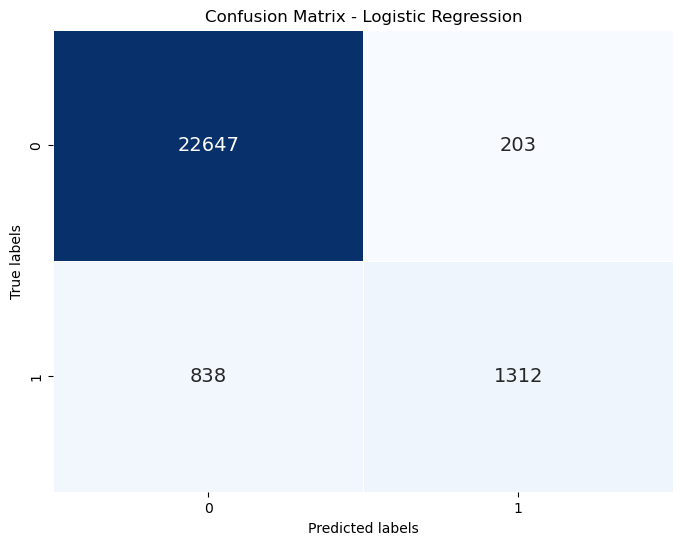

In [18]:
from sklearn.metrics import confusion_matrix

# Computing confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix heatmap
plot.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5)
plot.title('Confusion Matrix - Logistic Regression')
plot.xlabel('Predicted labels')
plot.ylabel('True labels')
plot.show()

Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Separating characteristics and target variable
char = data.drop('diabetes', axis=1)  # Features
target_var = data['diabetes']  # Target variable

# dividing the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(char, target_var, test_size=0.25, random_state=42)

# Model training for the Random Forest Classifier
model = RandomForestClassifier(random_state=50)
model.fit(X_train, y_train)

# Making predictions on testing set
y_pred = model.predict(X_test)

# Model Evaluation
accuracy_rfc = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {accuracy_rfc:.4f}')

# classification report
print('\nReport on classification:')
print(classification_report(y_test, y_pred))

# confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Random Forest Classifier Accuracy: 0.9700

Report on classification:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22850
           1       0.96      0.68      0.80      2150

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000


Confusion Matrix:
[[22786    64]
 [  687  1463]]


In [20]:
# Computing confusion matrix
cm_r = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix heatmap for RFC
plot.figure(figsize=(8, 6))
sns.heatmap(cm_r, annot=True, fmt='d', cmap='Greens', cbar=False,
            annot_kws={'fontsize': 14}, linewidths=0.5)
plot.title('Random Forest Classifier for confusion matrix')
plot.xlabel('Anticipated labels')
plot.ylabel('True labels')
plot.show()

K-means Clustering

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the features for X and Y axes
X = data[['age', 'bmi']]  # Features: 'age' for X-axis, 'bmi' for Y-axis
y = data['diabetes']  # Target: 'diabetes'

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Before K-Means
plot.figure(figsize=(12, 6))
plot.subplot(1, 2, 1)
plot.scatter(X_scaled[:, 0], X_scaled[:, 1], s=50, c=y, cmap='coolwarm', edgecolor='k')
plot.title('Before K-Means')
plot.xlabel('Age (Standardized)')
plot.ylabel('BMI (Standardized)')
plot.colorbar(label='Diabetes Status')

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=0)  # We expect 2 clusters: diabetic and non-diabetic
kmeans.fit(X_scaled)
y_kmeans = kmeans.predict(X_scaled)

# After K-Means
plot.subplot(1, 2, 2)
plot.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, s=50, cmap='coolwarm', edgecolor='k')
centers = kmeans.cluster_centers_
plot.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, edgecolor='k', label='Centroids')

# Draw circles around clusters to highlight them
for i, center in enumerate(centers):
    plot.scatter(center[0], center[1], s=1000, facecolors='none', edgecolors='black', linewidths=2, label=f'Cluster {i+1}')
plot.title('After K-Means')
plot.xlabel('Age (Standardized)')
plot.ylabel('BMI (Standardized)')
plot.legend()
plot.show()

c:\Users\jagad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


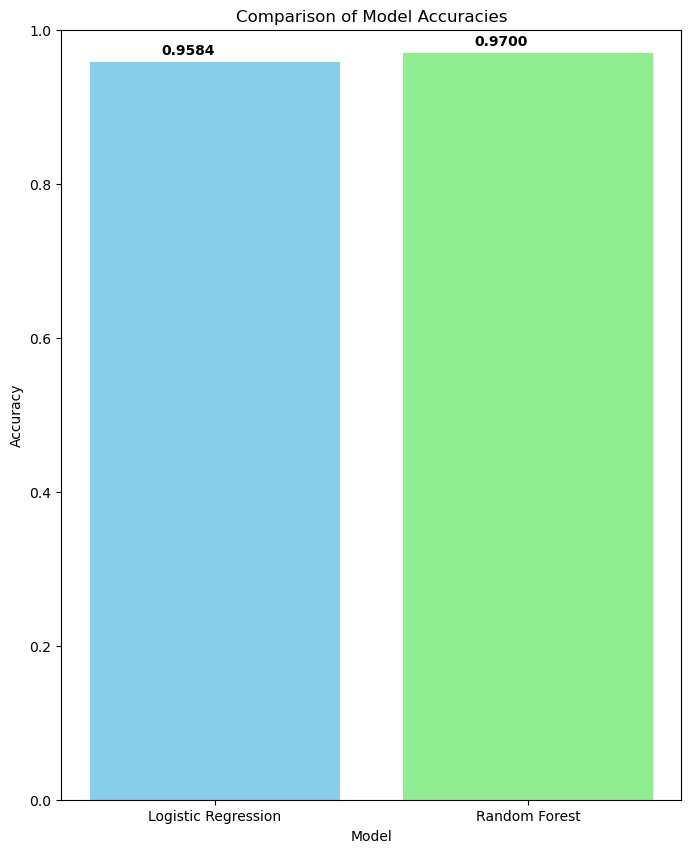

In [23]:
# Comparing accuracies of respective models
model = ['Logistic Regression', 'Random Forest']
accuracie = [accuracy_lr, accuracy_rfc]

# Plotting the accuracies
import matplotlib.pyplot as plot

plot.figure(figsize=(8, 10))
plot.bar(model, accuracie, color=['skyblue', 'lightgreen'])
plot.title('Comparison of Model Accuracies')
plot.xlabel('Model')
plot.ylabel('Accuracy')
plot.ylim(0, 1)  

for i, v in enumerate(accuracie):
    plot.text(i, v+0.01 , f'{v:.4f}', ha='right', fontweight='bold')

plot.show()